               precision    recall  f1-score   support

     Moderate       0.86      0.94      0.90      1507
Not Depressed       0.85      0.64      0.73       489
       Severe       0.70      0.63      0.67       227

     accuracy                           0.84      2223
    macro avg       0.80      0.74      0.76      2223
 weighted avg       0.84      0.84      0.84      2223



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


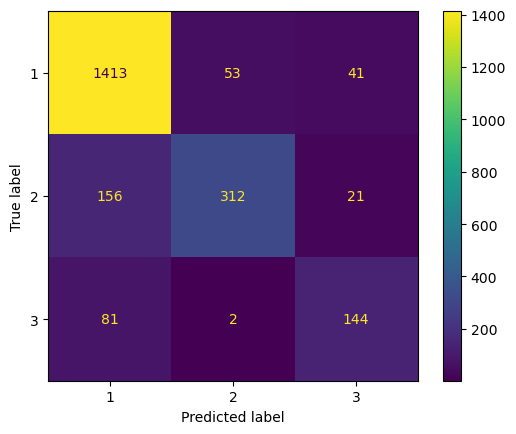

In [1]:
# This code snippet imports the necessary libraries to train a ML model using Multinomial Naive Bayes
# Classifier and outputs the classification report as Precion,Recall,Accuracy,Macro Avg and Weighted
# Avg. It also prints the confusion matrix for the given model.


from pandas import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
dat=read_csv(r'C:\Users\Ayush\Downloads\train.csv')
doc=dat["Text_data"].tolist()
docy=dat["Label"].tolist()
for i in range(len(docy)):
    if(docy[i]=="moderate"):
        docy[i]=1
    elif(docy[i]=="not depression"):
        docy[i]=2
    else:
        docy[i]=3


vectorizer=CountVectorizer(analyzer='word', stop_words='english')
X=vectorizer.fit_transform(doc)
X_train, X_test,y_train, y_test = train_test_split(X,docy,random_state=1,test_size=0.25,shuffle=True)
clf = MultinomialNB()
clf.fit(X_train,y_train)
pred=list(clf.predict(X_test))
target_names = ['Moderate', 'Not Depressed', 'Severe']
print(classification_report(y_test,pred, target_names=target_names))


plot_confusion_matrix(clf, X_test, y_test) 
plt.show()


# vectorizer.get_feature_names_out()
# print(X.toarray())



In [2]:
# When dealing with multiclass models.we tend to compare the One VS Rest Performance of the model.
# To achieve that, we use Label Binarizer which does the desired action.

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape
label_binarizer.transform([2])
class_of_interest = 3
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]


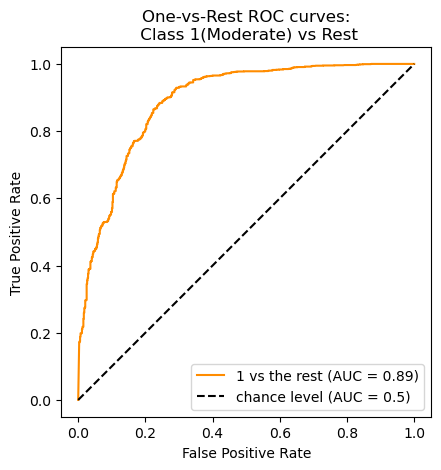

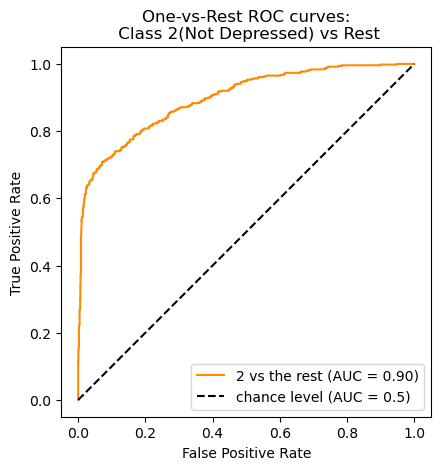

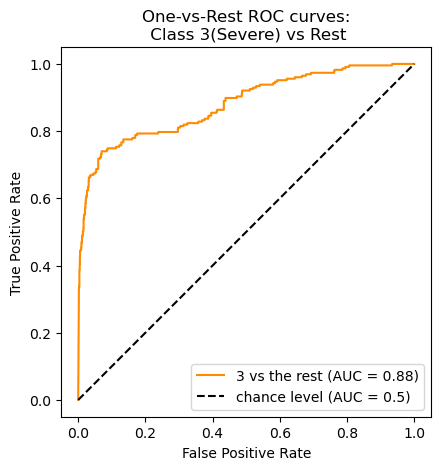

In [3]:
# We can also display the ROC Curve for the given trained model. A ROC Curve(Receiver Operating 
# Characterstics) Curve is used to display the graph between True Positive Rate and False Positive 
# Rate.



 
from sklearn.metrics import RocCurveDisplay
y_score=clf.fit(X_train,y_train).predict_proba(X_test)

RocCurveDisplay.from_predictions(
    y_onehot_test[:,0],
    y_score[:,0],
    name=f"1 vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n Class 1(Moderate) vs Rest")
plt.legend()
plt.show()
RocCurveDisplay.from_predictions(
    y_onehot_test[:,1],
    y_score[:,1],
    name=f"2 vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n Class 2(Not Depressed) vs Rest")
plt.legend()
plt.show()
RocCurveDisplay.from_predictions(
    y_onehot_test[:,2],
    y_score[:,2],
    name=f"3 vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n Class 3(Severe) vs Rest")
plt.legend()
plt.show()

In [4]:
# Let's check the number of samples that were used to train the above model.
print("Moderate: ",docy.count(1)-1507)
print("Not Depressed: ",docy.count(2)-489)
print("Severe: ",docy.count(3)-227)



Moderate:  4512
Not Depressed:  1482
Severe:  674


In [5]:
# The count of the samples belonging to first class is too high as compared to other classes. This may 
# cause the model to be biased towards the one with more data thus generating more number of false 
# positives. To deal with this, we use the library Imbalanced Learn, in which we use SMOTE to equalize 
# the count of training samples of all the classes by increasing the number of data samples.

from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X,docy)
print("Moderate: ",y_res.count(1))
print("Not Depressed: ",y_res.count(2))
print("Severe", y_res.count(3))




Moderate:  6019
Not Depressed:  6019
Severe 6019


               precision    recall  f1-score   support

     Moderate       0.82      0.87      0.84      1520
Not Depressed       0.85      0.74      0.79      1488
       Severe       0.82      0.87      0.84      1507

     accuracy                           0.83      4515
    macro avg       0.83      0.83      0.82      4515
 weighted avg       0.83      0.83      0.82      4515



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


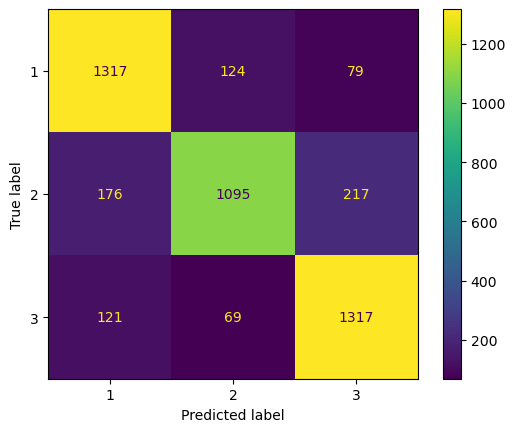

In [6]:
# As we can see that the number of samples after using SMOTE has become equal for all the 3 classes.
# Now let's train the model using this dataset and generate it's classification report and confusion matrix.

X_train1, X_test1 ,y_train1, y_test1 = train_test_split(X_res,y_res,random_state=1,test_size=0.25,shuffle=True)

clf.fit(X_train1,y_train1)
pred1=list(clf.predict(X_test1))
target_names = ['Moderate', 'Not Depressed', 'Severe']
print(classification_report(y_test1,pred1, target_names=target_names))


plot_confusion_matrix(clf, X_test1, y_test1) 
plt.show()


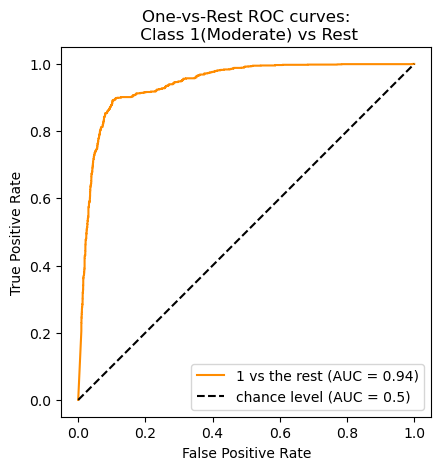

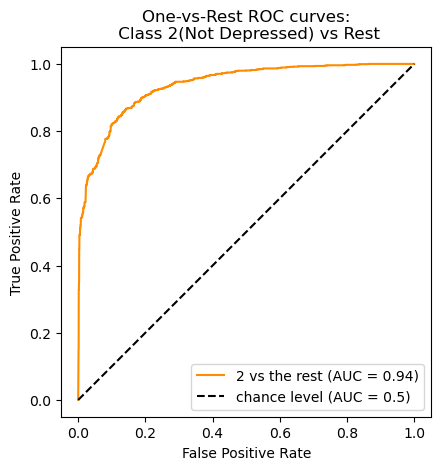

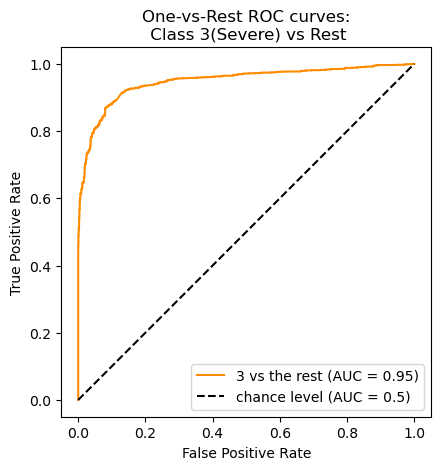

In [7]:
# Let's judge the working of the new model for one class against the rest using ROC Curve.

label_binarizer = LabelBinarizer().fit(y_train1)
y_onehot_test = label_binarizer.transform(y_test1)
y_onehot_test.shape
label_binarizer.transform([2])
class_of_interest = 3
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

 

y_score=clf.fit(X_train1,y_train1).predict_proba(X_test1)

RocCurveDisplay.from_predictions(
    y_onehot_test[:,0],
    y_score[:,0],
    name=f"1 vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n Class 1(Moderate) vs Rest")
plt.legend()
plt.show()
RocCurveDisplay.from_predictions(
    y_onehot_test[:,1],
    y_score[:,1],
    name=f"2 vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n Class 2(Not Depressed) vs Rest")
plt.legend()
plt.show()
RocCurveDisplay.from_predictions(
    y_onehot_test[:,2],
    y_score[:,2],
    name=f"3 vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n Class 3(Severe) vs Rest")
plt.legend()
plt.show()

In [8]:
# Another way to deal with imbalanced set is to use Near Miss which reduces the number of data samples.

from imblearn.under_sampling import NearMiss 

nr = NearMiss() 
X_near, Y_near= nr.fit_resample(X, docy)

In [9]:
# Let's see the new number of data samples.

print("Moderate:",Y_near.count(1))
print("Not Depressed:",Y_near.count(2))
print("Severe:",Y_near.count(3))

Moderate: 901
Not Depressed: 901
Severe: 901


               precision    recall  f1-score   support

     Moderate       0.85      0.63      0.73       222
Not Depressed       0.95      0.64      0.77       241
       Severe       0.60      0.98      0.74       213

     accuracy                           0.75       676
    macro avg       0.80      0.75      0.75       676
 weighted avg       0.81      0.75      0.75       676



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


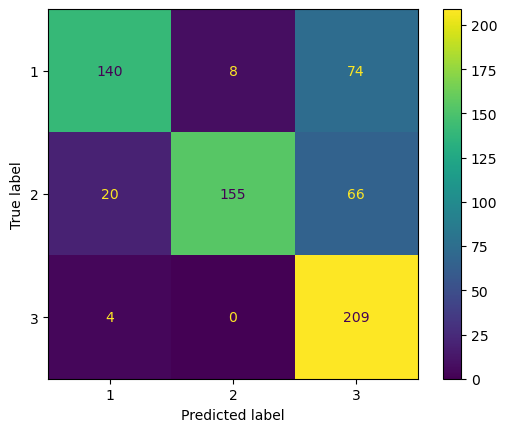

In [10]:
# As we can see, the number of samples has decreased. Now, let's train the model based on this dataset.

X_train2,X_test2,y_train2,y_test2=train_test_split(X_near,Y_near,random_state=1,test_size=0.25,shuffle=True)
clf.fit(X_train2,y_train2)
pred2=list(clf.predict(X_test2))
target_names = ['Moderate', 'Not Depressed', 'Severe']
print(classification_report(y_test2, pred2, target_names=target_names))

plot_confusion_matrix(clf,X_test2,y_test2)
plt.show()




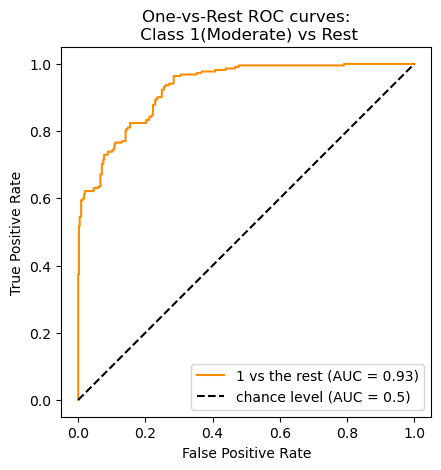

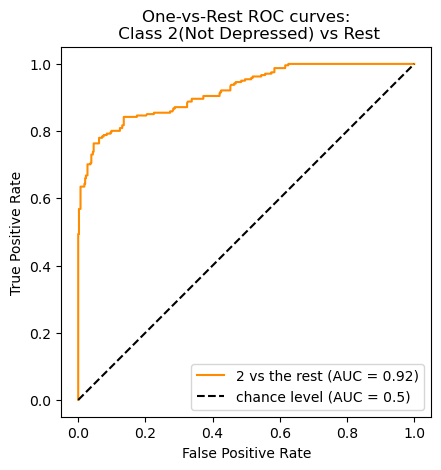

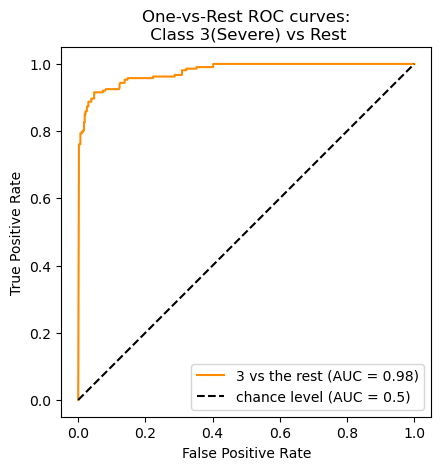

In [11]:
# Let's judge the working of the new model for one class against the rest using ROC Curve.

label_binarizer = LabelBinarizer().fit(y_train2)
y_onehot_test = label_binarizer.transform(y_test2)
y_onehot_test.shape
label_binarizer.transform([2])
class_of_interest = 3
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

 

y_score=clf.fit(X_train2,y_train2).predict_proba(X_test2)

RocCurveDisplay.from_predictions(
    y_onehot_test[:,0],
    y_score[:,0],
    name=f"1 vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n Class 1(Moderate) vs Rest")
plt.legend()
plt.show()
RocCurveDisplay.from_predictions(
    y_onehot_test[:,1],
    y_score[:,1],
    name=f"2 vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n Class 2(Not Depressed) vs Rest")
plt.legend()
plt.show()
RocCurveDisplay.from_predictions(
    y_onehot_test[:,2],
    y_score[:,2],
    name=f"3 vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n Class 3(Severe) vs Rest")
plt.legend()
plt.show()